In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [18]:
data = pd.read_excel('train.xlsx')

In [41]:
X = data.iloc[:,[9,12,15,18,23,24,25]].values
y = data['Salary'].values

In [42]:
X0 = np.ones(len(X))
X = np.array([X0,X[:,0],X[:,1],X[:,2],X[:,3],X[:,4],X[:,5],X[:,6],])

In [43]:
X.shape

(8, 3998)

In [44]:
X = X.T

In [45]:
X.shape

(3998, 8)

In [46]:
y = y.reshape(-1,1)

sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [59]:
b = np.zeros(X.shape[1])

In [60]:
b

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
def cost_function(X,y,b):
    n = len(X)
    return np.sum((X.dot(b) - y)**2) / n

In [62]:
cost_function(X,y,b)

3997.999999999997

In [63]:
def gradient(X,y,b,epochs,alpha):
    cost_history = [0] * epochs
    n = len(X)
    for i in range(epochs):
        y_pred = X.dot(b)
        loss = y_pred - y
        grad = (2/n) * loss.dot(X)
        b = b - alpha * grad
        cost_history[i] = cost_function(X,y,b)
    return cost_history,b

In [64]:
epochs = 100000
alpha = 0.01
cost,weights = gradient(X,y.flatten(),b,epochs,alpha)

In [65]:
weights

array([ 0.        ,  0.03927745,  0.05708703, -0.11627146,  0.04851445,
        0.06626064,  0.03315678,  0.11909123])

In [66]:
import matplotlib.pyplot as plt

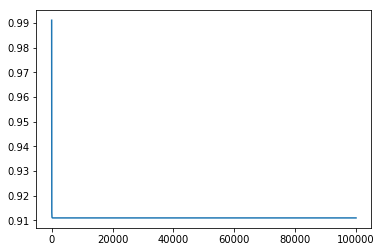

In [67]:
plt.plot([i for i in range(epochs)],cost)

In [68]:
cost[-1]

0.9109320745762092

In [57]:
X[0]

array([0.        , 0.64723345, 1.93967569, 0.28328181, 0.797646  ,
       0.12724026, 0.96114847, 0.09503715])